# Probability Function

## Four important concept:
- Experiment
- Sample Space
- Sample Outcome
- Event

# Combinatorics

## Example

**Context:** a firm is looking to fill two positions. Three woman $(W_1,W_2,W_3)$ and two man apply $(M_1,M_2)$.

**Experiment:** _hiring two workers_. This is an experiment because, in theory, it can be repeated many times and has a well defined set of possible outcomes.

**Sample Space:** $S=\{(W_1,W_2),(W_1,W_3),(W_1,M_1),(W_1,M_2),(W_2,W_3),(W_2,M_1),(W_2,M_2),(W_3,M_1),(W_3,M_2),(M_1,M_2)\}$. The **Sample Outcome** is one of the options in the sample space, for instance hiring two man $(M_1,M_2)$. In the sample outcome is represented by $s \in S$.


### How can we know the total number of possible outcomes composing the sample space?

It depends on the context. Depending on the experiment, an option can be **repeated** for two different outcomes, and **order** may be relevant.

### 1. Combination without repetition

In the previous example, the options cannot be repeated. Once one worker is hired, she/he cannot be hired again. Also, order doe not matter because the positions are the same, then $(W_1,W_2)=(W_2,W_1)$. This particular case is know as a **combination:** that is, selecting $m$ objects from $n$ total options without regard to order.
$$C_{n,m}=\frac{n!}{m!(n-m)!}=\frac{5!}{2!3!}=\frac{5\times 4}{2}=10
$$

In [16]:
prod(3:1)

[1] 6

In [15]:
combine<-function(n,m)
    {prod(n:1)/(prod(m:1)*prod((n-m):1))}
combine(5,2)

[1] 10

In [17]:
choose(5,2)

[1] 10

## What if the order matters?

###  2. Permutation without repetition

In our previous example the order did not matter because the two opening positions were the same. Now, think that the first position is for data scientist and the second is for manager. 

**Experiment:** _hire one worker for data science and one for manager._

This is known as a **permutation** where an **ordered** sequence of m objects taken from n distinct possibilities.

$$P_{n,m}=\frac{n!}{(n-m)!}=\frac{5!}{3!}=5\times 4=20$$

In [24]:
permutes<-function(n,m)
    {prod(n:1)/prod((n-m):1)}
permutes(5,2)

[1] 20

In [1]:
library()

In [1]:
#install.packages('gtools')
library('gtools')

In [31]:
x<-c('W1','W2','W3','M1','M2')
permutations(n=5,r=2,v=x)

M1,M2
M1,W1
M1,W2
M1,W3
M2,M1
M2,W1
M2,W2
M2,W3
W1,M1
W1,M2
W1,W2


In [33]:
nrow(permutations(n=5,r=2,v=x))

[1] 20

### 3. Permutation with repetition

The number of permutations with replacement is calculated with a simple equation. If there are $n$ options to choose $m$ times, then the number of permutations is $n^m$. 

**Experiment:** create a license plate that can be made from four digits? 

**Sample Space:** there are 10 possibles options to choose (numbers from 0 to 9) for each of the 4 digits. Therefore there are $10^4=10,000$ possible license plates.

**Sample Outcome:** one of the possible options from the sample space. For instance 0001 or 1234.

In [37]:
p<-seq(0,9)
nrow(permutations(n=length(p),r=4,v=p,repeats.allowed=T))

[1] 10000

The concepts of **permutations** with and without repetition are related with the concepts of **sampling** with and without replacement in statistics.

# Probability Function

If $A$ is any event defined on a sample space $S$, the symbol $P(A)$ denote the probability of $A$ and $P$ is known as the _probability function_. It is a mapping from a set to a number in $[0,1]$. 

Remember, an event $A$ is any **subset** of the **sample space**, $A \subseteq S$.

--------------------------------------------------------------------------------------------------------------------------
#### Axioms of probability
1. For any event $A$ defined over $S$: $0 \leq P(A) \leq 1$.

2. For two mutually exclusive events $A$ and $B$: $P(A \cup B)= P(A)+P(B)$.

3. Let $A_1, A_2, ...$ be defined over $S$. IF $A_i \cap A_j = \emptyset$ for all $i \neq j$, then 

    $$P(\bigcup\limits_{i=1}^{\infty} A_{i})=\sum_{i=1}^{\infty}P(A_i)$$
--------------------------------------------------------------------------------------------------------------------------

#### Result 1: 
For an event $A \subseteq S$, $P(A^{c})=1-P(A)$.

_Proof:_ note that $A \cup A^{c}=S$. Then by axiom 2, $P(S)=P(A \cup A^{c})=P(A)+P(A^{c})$.


#### Application of Result 1:

Suppose that a room contains $m$ students. Also, assume that every day of the year is equally likely to be a birthday. What is the probability that at least two of the students have the same birthday?

**Solution:**

- Event $A$: two or more students have the same birthday. In other words, event $A$ requires to find one birthday match. It is a difficult probability to calculate so let's start with the complement probability.

- Event $A^{c}$: no two students in the room have the same birthday.

The event $A^{c}$ is can be divided in different sub-events. Take individual 1, her birthday can happen in any of the 365 days of the year. Then, compare individuals 1 and 2, there are 364 for which individuals 1 and 2 birthdays are different. For three that number goes to 363 because it has to be different from individual 1 and 2 birthdays. The process continues in the same way. Then, the event $A^{c}$ can happen in $365 \times 364 \times ... \times (365-m+1)$. The total sample space can be calculated using **permutation with repetition** so that $S=356^{m}$. Therefore

$$P(A^{c})=\frac{365 \times 364 \times ... \times (365-m+1)}{365^{m}}.$$

By using **Result 1**, we can write

$$P(A)=1-P(A^{c})$$

Note that the probability of the event $A$ depends on the size of the class $m$. Let's use R to illustrate how the probability evolves with the class's size.

In [6]:
(1-(365*364*363)/(365^3))*100

[1] 0.8204166

[1] 23

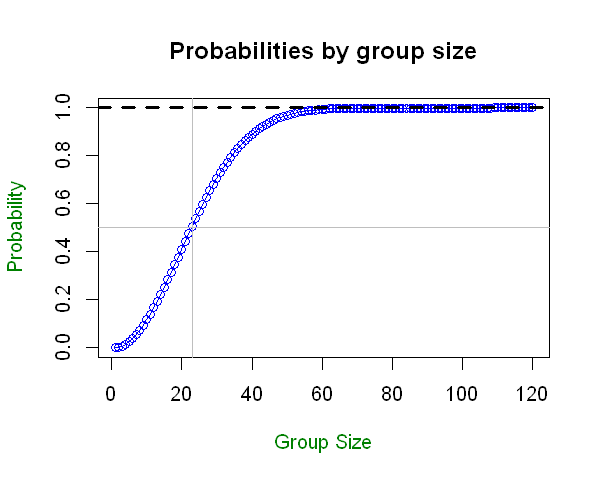

In [65]:
m<-seq(1:120) #Define a sequence from 1 to 120 which represents the total number of students in the room 
pa<-vector() #Initialize an empty vector that will contain the probability pa

#Calculate the probability of the event A for different group sizes 
for (j in m){
  p<-1- (prod(365:(365-j+1))/(365^j))
  pa<-append(pa,p)
}

length(pa[pa<0.51])

#Create plot
plot(pa,type="o", col="blue",ann=FALSE)

abline(h=1, col="black",lwd=3, lty=2)

abline(h=0.5,v=length(pa[pa<0.51]),col="gray",lwd=0.5)

title(main="Probabilities by group size")
title(xlab="Group Size", col.lab=rgb(0,0.5,0))
title(ylab="Probability", col.lab=rgb(0,0.5,0))

options(repr.plot.width=5, repr.plot.height=4)
